# 0. DEPENDENCIES

Fix for Jupyter Notebook imports:

In [1]:

import os
import sys

print(os.getcwd())

sys.path.append("S:\Dropbox\\000 - CARND\CarND-T1-P5-Vehicle-Detection")

for path in sys.path: print(path)
    

S:\Dropbox\000 - CARND\CarND-T1-P5-Vehicle-Detection\src\notebooks

C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\python35.zip
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\DLLs
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\cycler-0.10.0-py3.5.egg
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\IPython\extensions
C:\Users\gmzco\.ipython
S:\Dropbox\000 - CARND\CarND-T1-P5-Vehicle-Detection


Remove the additional entry if needed:

In [2]:
# sys.path = sys.path[:-1]

for path in sys.path: print(path)


C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\python35.zip
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\DLLs
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\cycler-0.10.0-py3.5.egg
C:\Users\gmzco\AppData\Local\conda\conda\envs\carnd-term1\lib\site-packages\IPython\extensions
C:\Users\gmzco\.ipython
S:\Dropbox\000 - CARND\CarND-T1-P5-Vehicle-Detection


Load all dependencies:

In [3]:

import numpy as np
import glob

from importlib import reload
from sklearn.externals import joblib
from scipy.ndimage.measurements import label

import src.helpers.constants as C
import src.helpers.io as IO
import src.helpers.features as FT
import src.helpers.plot as PLT
import src.helpers.finder as FIND
import src.helpers.overlays as OV

# RELOAD:

reload(C)
reload(IO)
reload(FT)
reload(PLT)
reload(FIND)
reload(OV)


<module 'src.helpers.overlays' from 'S:\\Dropbox\\000 - CARND\\CarND-T1-P5-Vehicle-Detection\\src\\helpers\\overlays.py'>

# 1. LOAD TEST IMAGES

Load all 8 test images (the default 6 and 2 more other with cars closer to our own).

In [4]:

imgs_rgb = IO.load_images_rgb(glob.glob("../../input/images/test/*.jpg"))
imgs_test = IO.load_images_as(glob.glob("../../input/images/test/*.jpg"), "HLS") # RGB, HSV, LUV, HLS, YUV, YCR_CB (YCrCb), GRAY

# Get some basic data:

anyImg = imgs_rgb[0]

HEIGHT, WIDTH, CHANNELS = anyImg.shape

CENTER =  WIDTH // 2
MIDDLE = HEIGHT // 2


Preview them:

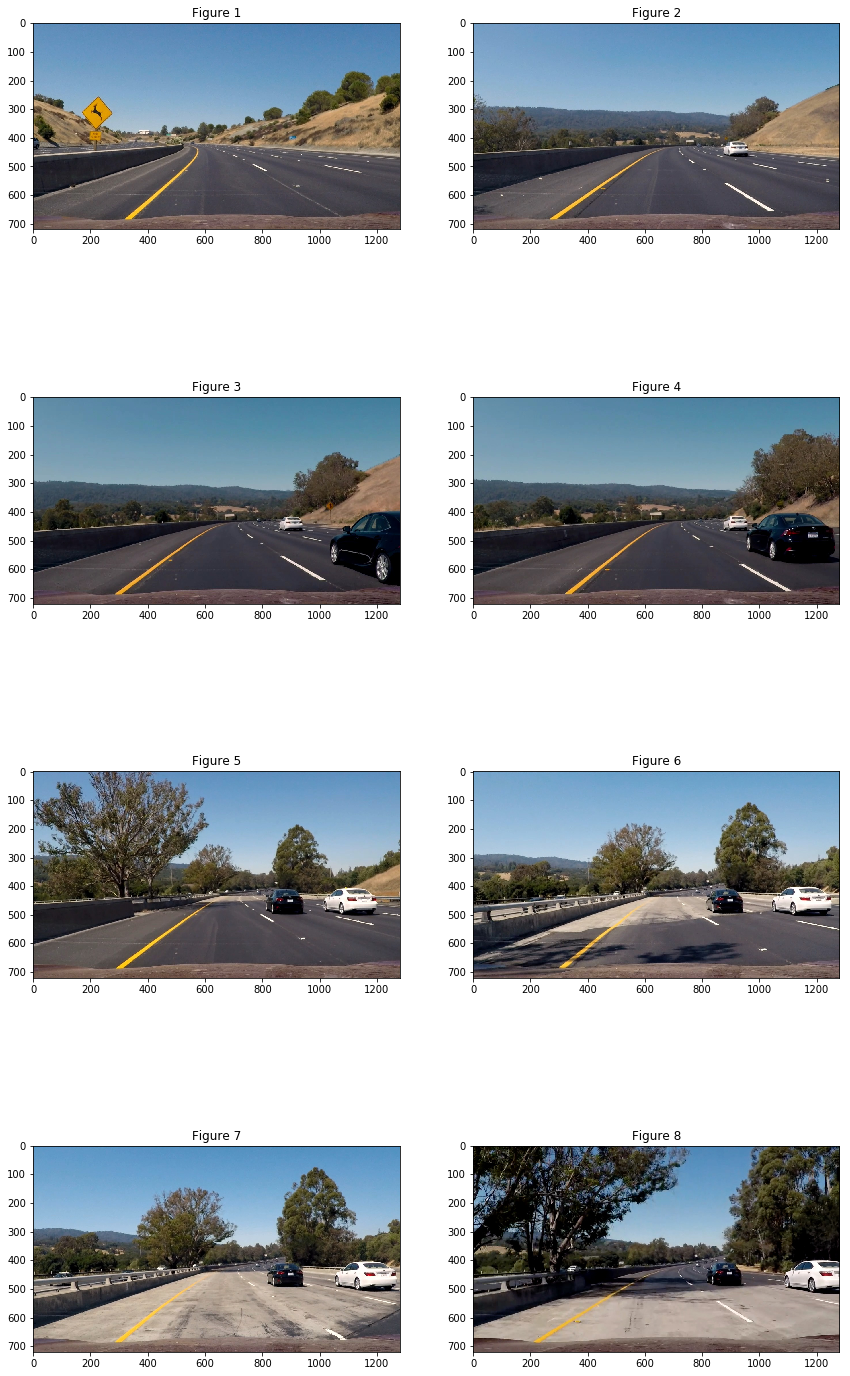

In [5]:

# TODO: UPDATE GRIDS!

PLT.showAll(imgs_rgb, 2)


# 2. LOAD THE CLASSIFIER AND GET THE WINDOWS

In [6]:

clf = joblib.load("../../output/models/classifier_augmented_nocars_2.pkl")
# clf = joblib.load("../../output/models/classifier_augmented.pkl")
# clf = joblib.load("../../output/models/classifier.pkl")
# clf = joblib.load("../../output/models/classifier_svc.pkl")

WINDOWS = C.WINDOWS(WIDTH)

print("TOTAL WINDOWS = {}".format(len(C.WINDOWS(WIDTH))))


TOTAL WINDOWS = 378


Let's detect the cars:

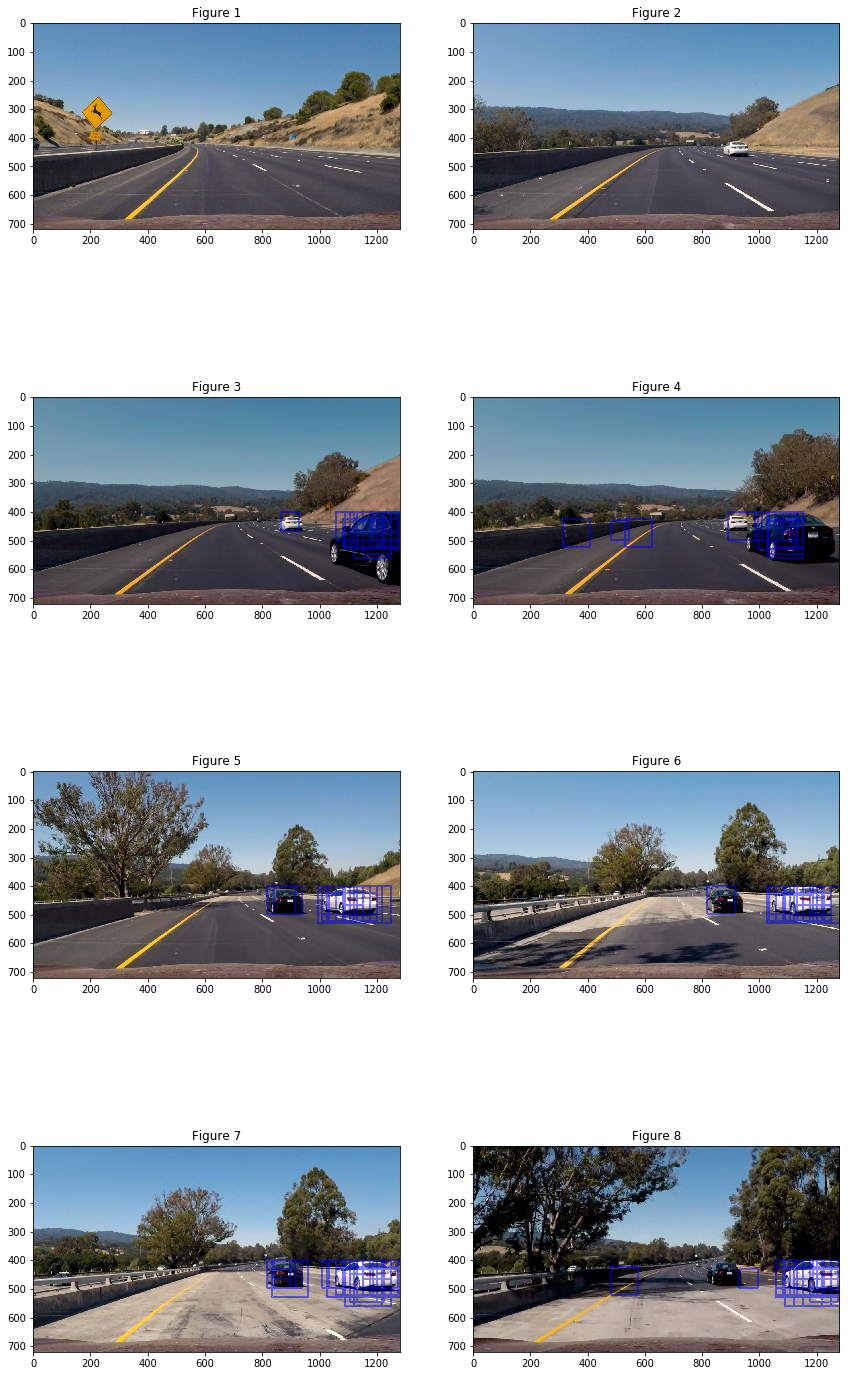

In [7]:

detections = [FIND.find_cars(img, WINDOWS, clf) for img in imgs_test]

PLT.showAll([OV.draw_boxes(img, detection) for img, detection in zip(imgs_rgb, detections)], 2)


And compute the raw heatmaps for those detections:

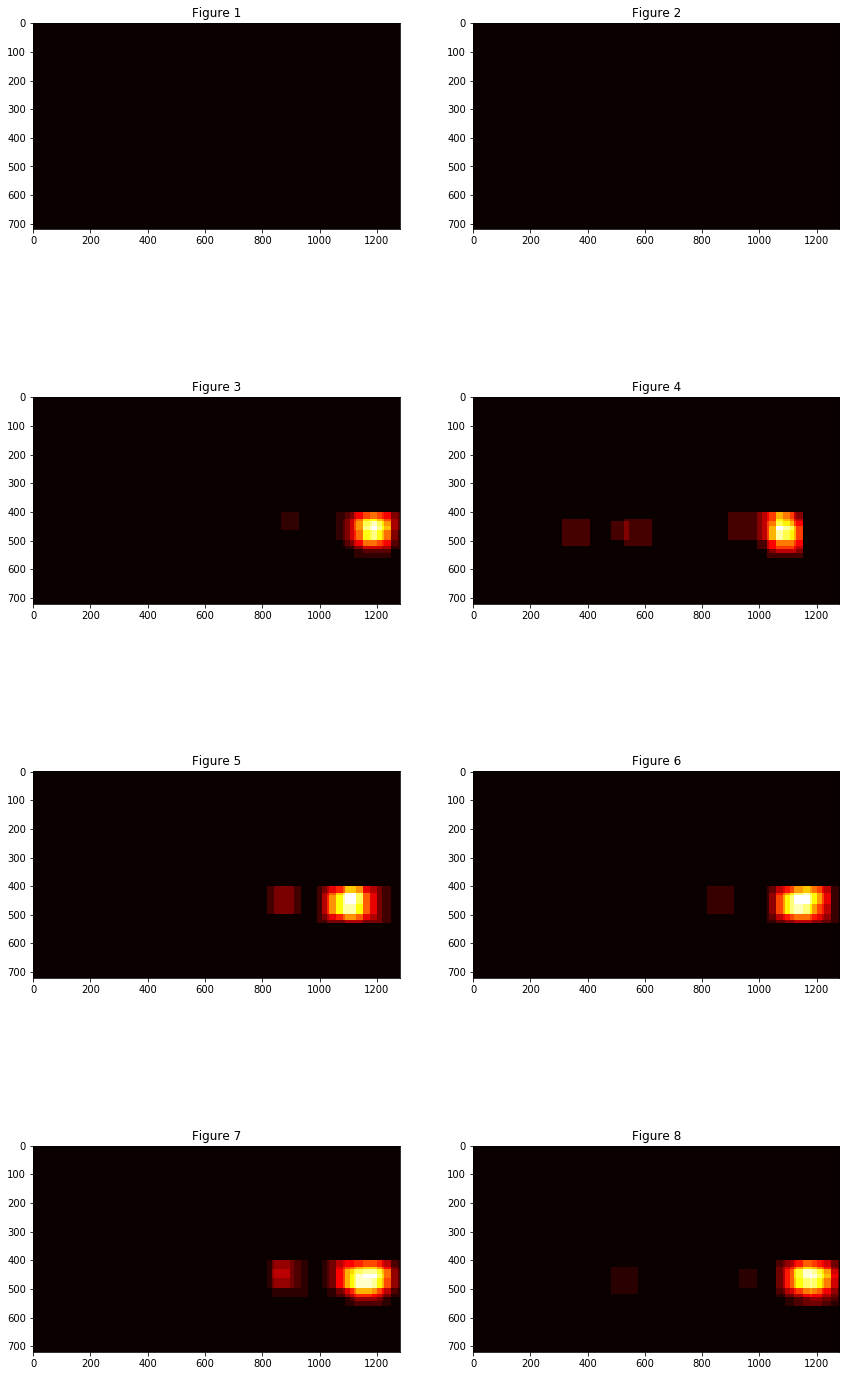

In [8]:

heatmaps = [OV.heatmap_boxes(detection, HEIGHT, WIDTH) for detection in detections]

PLT.showAll(heatmaps, 2, "hot")


Now let's apply a threshold to those heatmaps:

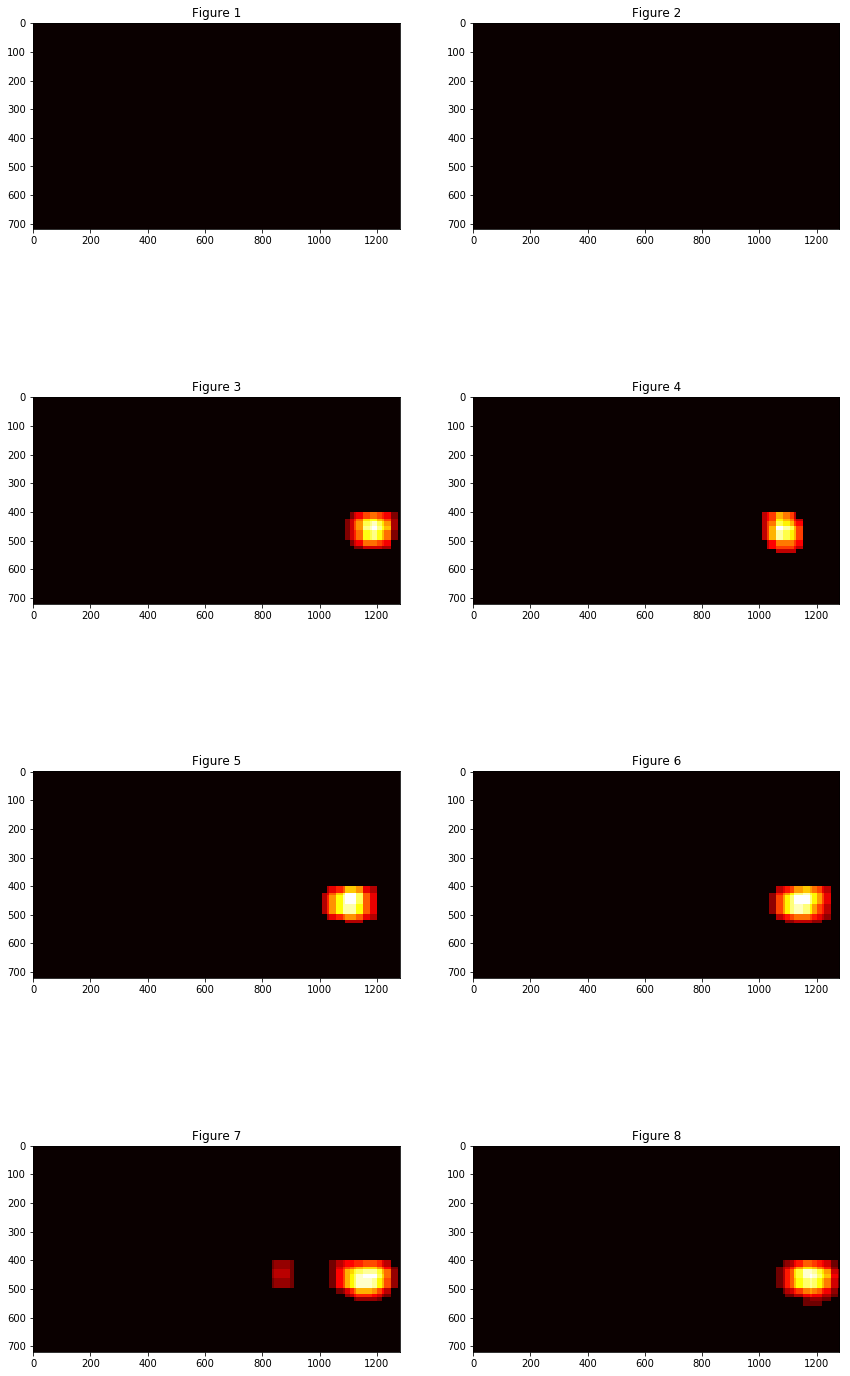

In [9]:

heatmaps = [OV.heatmap_threshold(heatmap, 2) for heatmap in heatmaps]

PLT.showAll(heatmaps, 2, "hot")


Let's label those matches:

In [10]:

labels = [label(heatmap) for heatmap in heatmaps]

for i, labels_found in enumerate(labels):
    print("{} CARS FOUND IN FIGURE {}".format(labels_found[1], i))


0 CARS FOUND IN FIGURE 0
0 CARS FOUND IN FIGURE 1
1 CARS FOUND IN FIGURE 2
1 CARS FOUND IN FIGURE 3
1 CARS FOUND IN FIGURE 4
1 CARS FOUND IN FIGURE 5
2 CARS FOUND IN FIGURE 6
1 CARS FOUND IN FIGURE 7


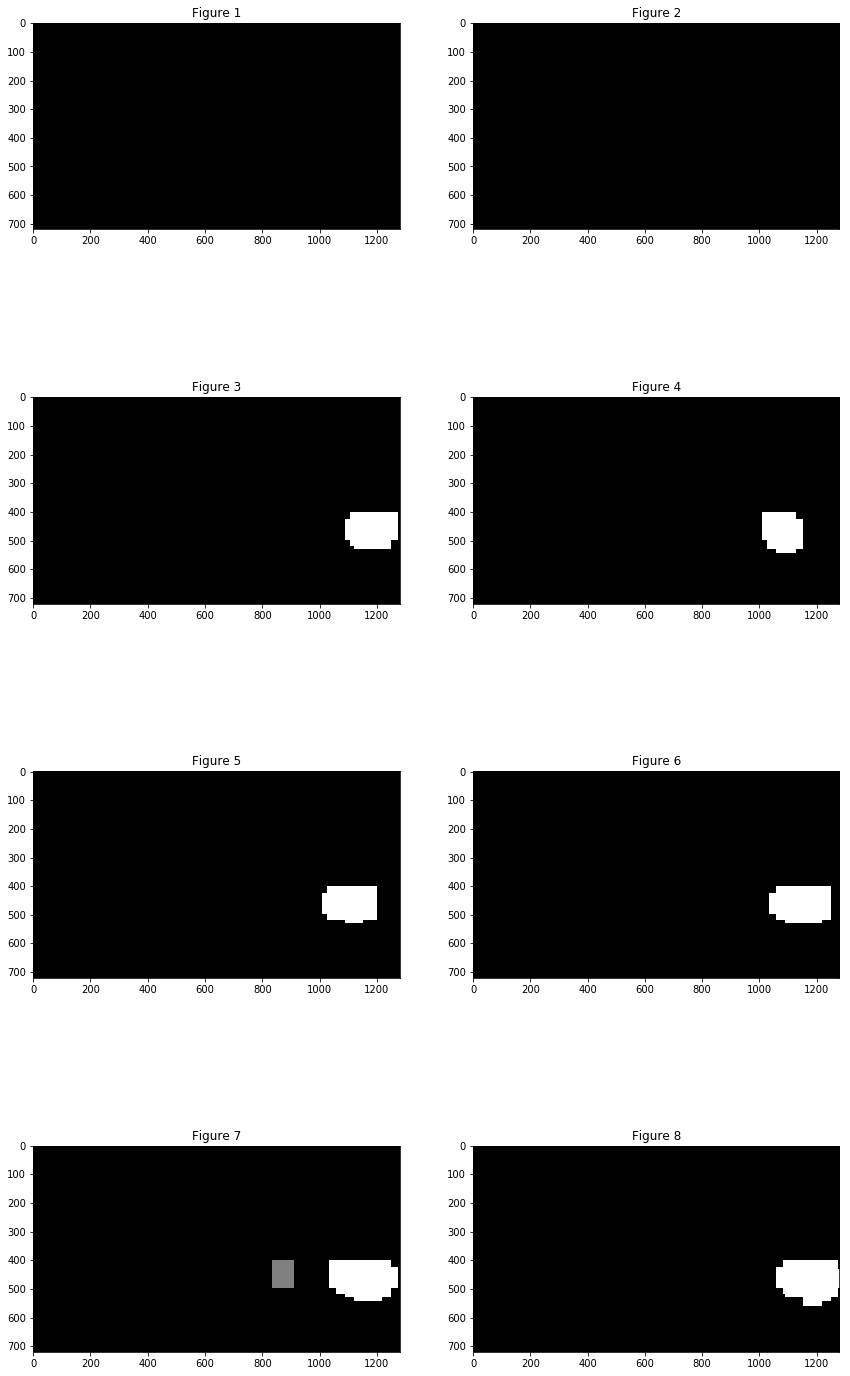

In [11]:

PLT.showAll(np.array(labels)[:, 0], 2, "gray")


Finally, let's draw the boxes:

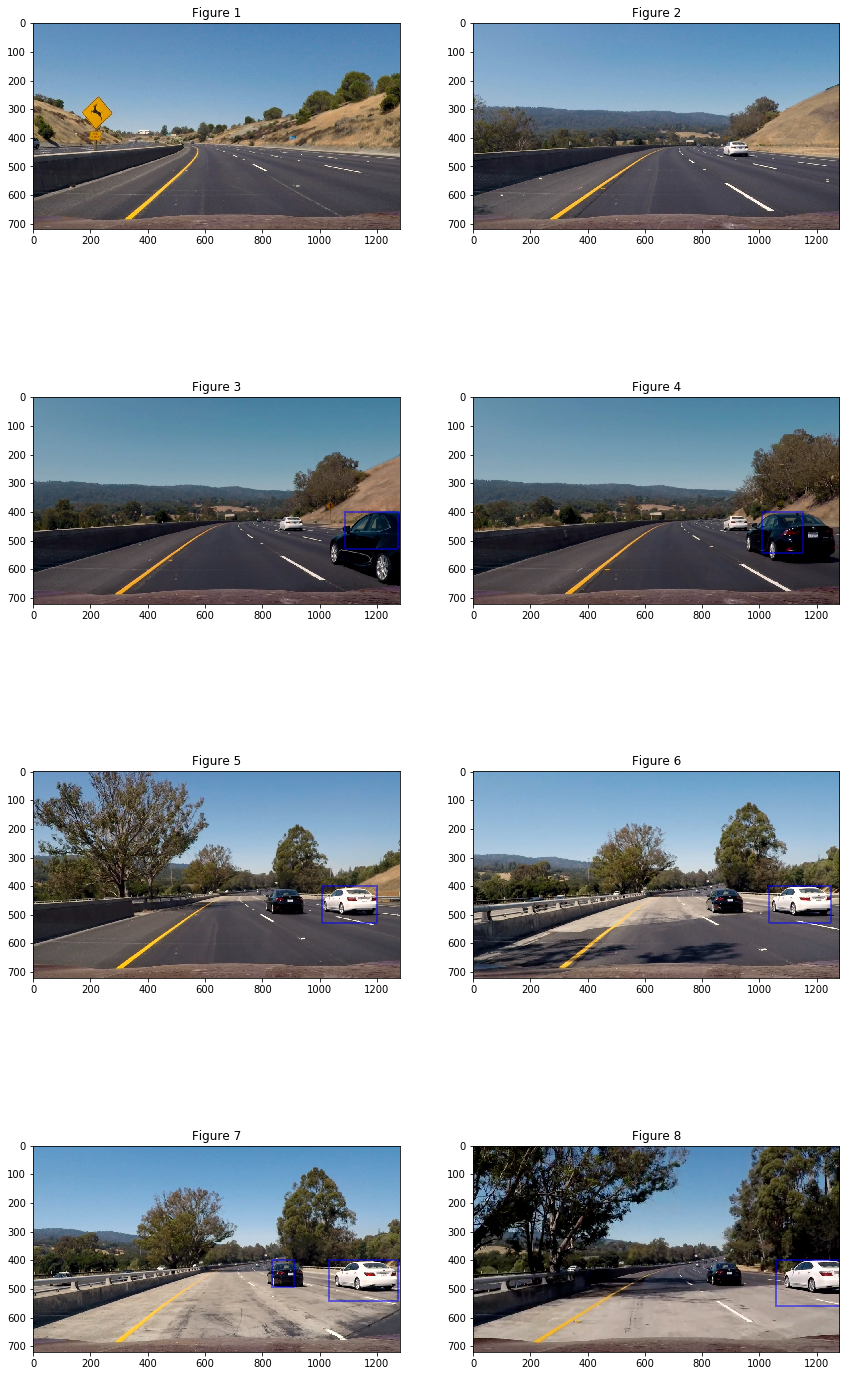

In [12]:

boxes = [FIND.find_boxes(heatmap) for heatmap in heatmaps]

PLT.showAll([OV.draw_boxes(img, box) for img, box in zip(imgs_rgb, boxes)], 2)
